## Notebook to visualize results

### 4.1 RBM for recognising MNIST images

In [1]:
from util import *
from rbm import RestrictedBoltzmannMachine 
from dbn import DeepBeliefNet

learning CD1


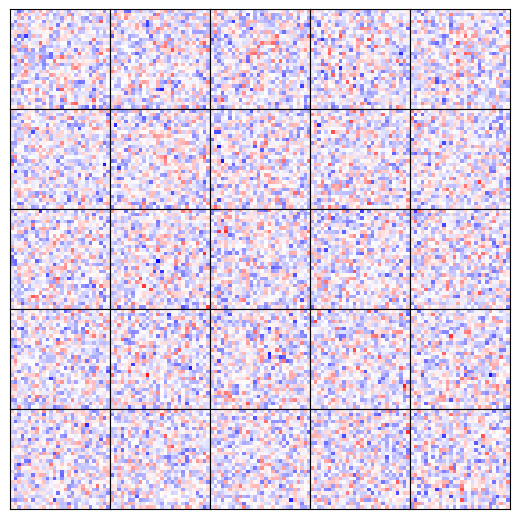

iteration=      0 recon_loss=86.3496


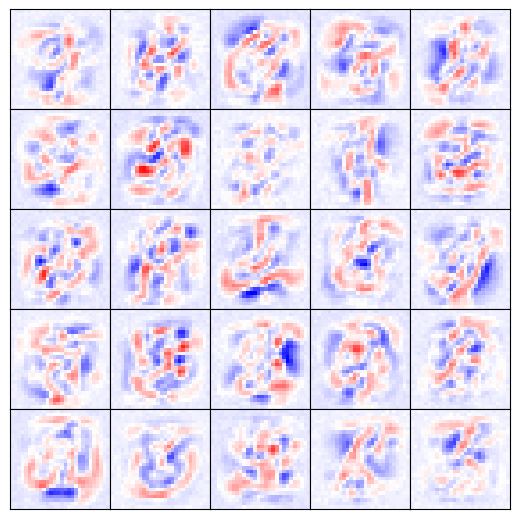

iteration=   5000 recon_loss=23.8059


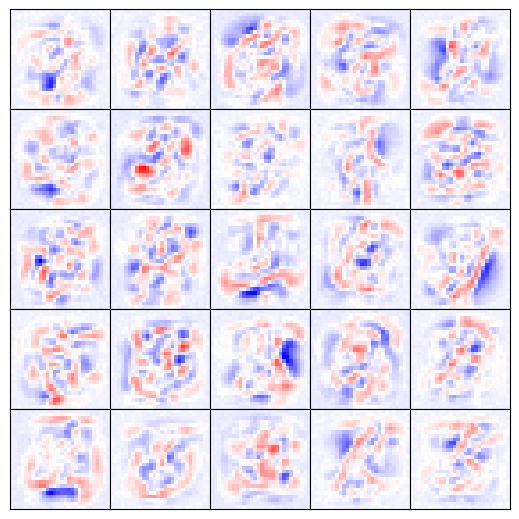

iteration=  10000 recon_loss=25.0809


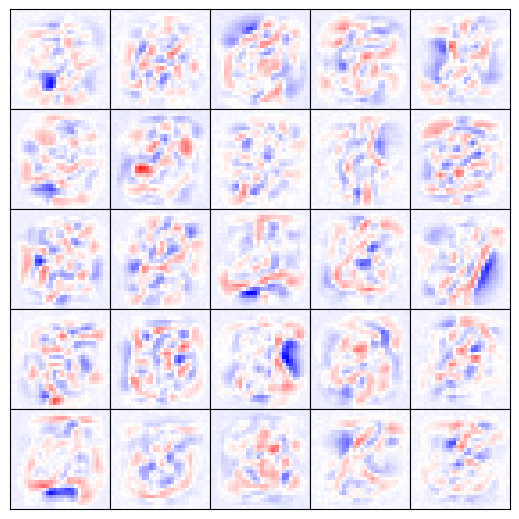

iteration=  15000 recon_loss=21.2908


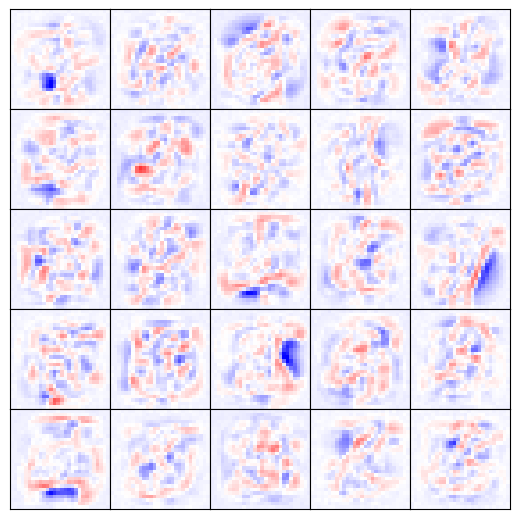

iteration=  20000 recon_loss=21.9515


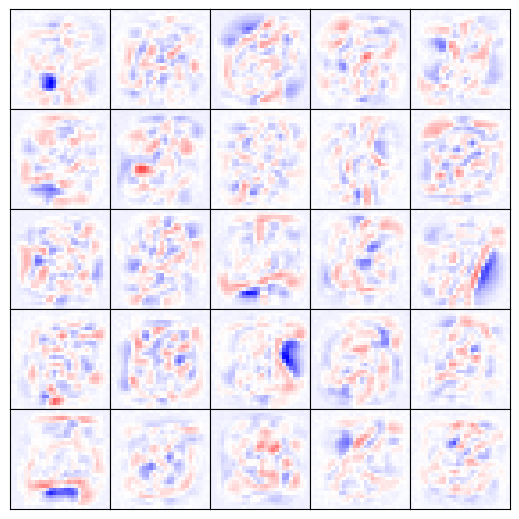

iteration=  25000 recon_loss=22.7207


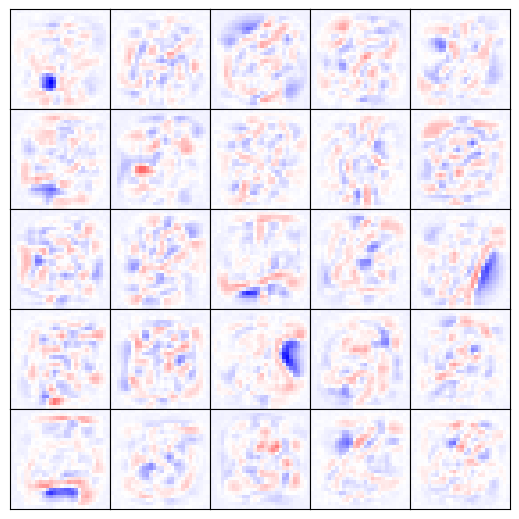

iteration=  30000 recon_loss=21.3629


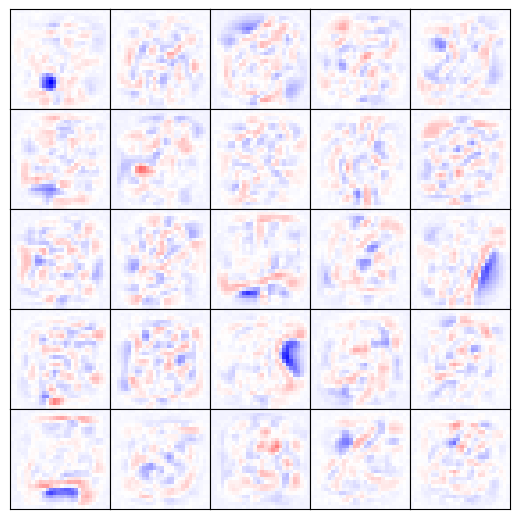

iteration=  35000 recon_loss=21.0992


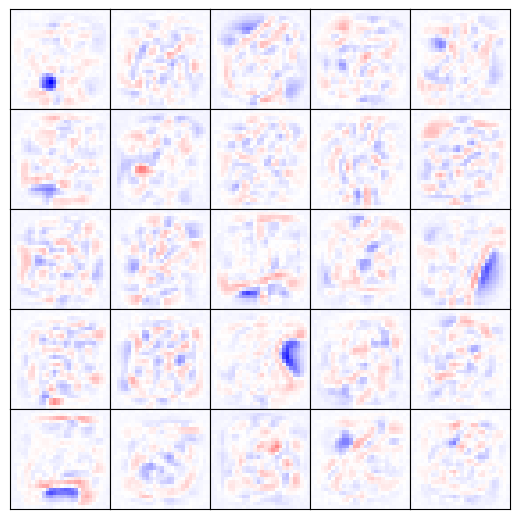

iteration=  40000 recon_loss=23.3843


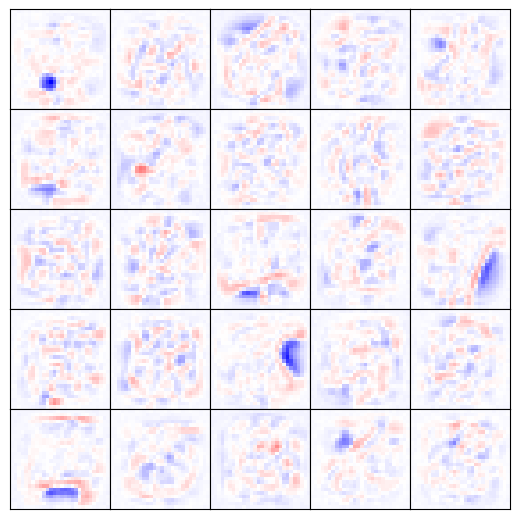

iteration=  45000 recon_loss=20.7420


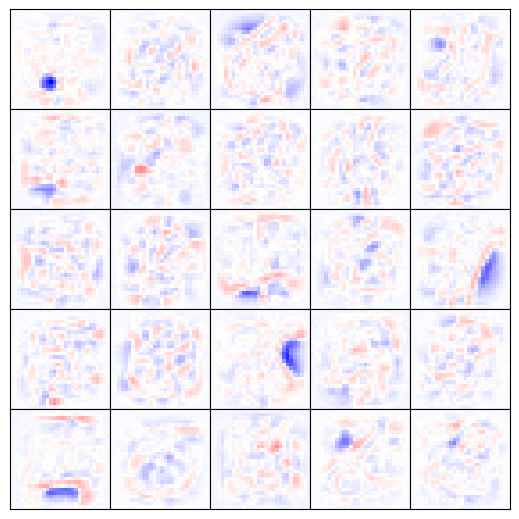

iteration=  50000 recon_loss=21.3440


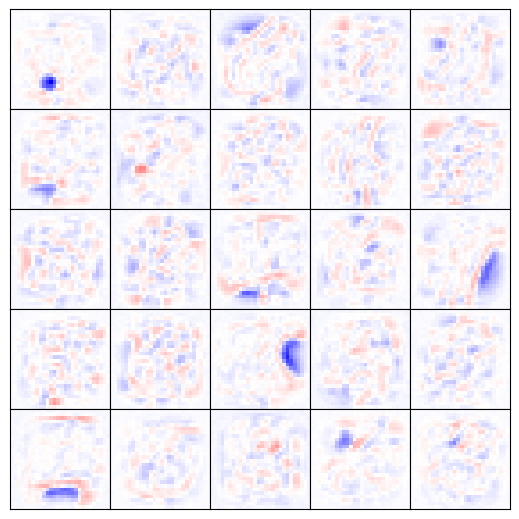

iteration=  55000 recon_loss=23.2213


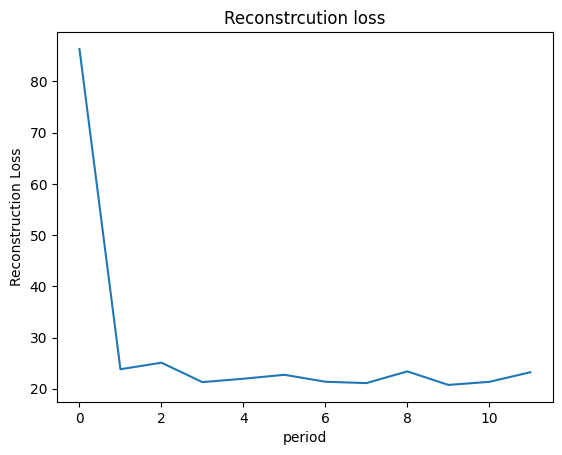

In [2]:
image_size = [28,28]
train_imgs,train_lbls,test_imgs,test_lbls = read_mnist(dim=image_size, n_train=60000, n_test=10000)
batch_s=20
nb_data=60000
epochs=20


rbm = RestrictedBoltzmannMachine(ndim_visible=784,
                                ndim_hidden=500,
                                is_bottom=True,
                                image_size=image_size,
                                is_top=False,
                                n_labels=10,
                                batch_size=batch_s)
nb_it = int(epochs * (nb_data // batch_s))
rbm.cd1(visible_trainset=train_imgs, n_iterations=nb_it,bool_plot=True)

